In [1]:
import pandas as pd
from src import train


file_path = "./data/processed/Tg.csv"
prop = "tg"
augmentation = True
outdir = "outputs/"    # 保存場所
data_name = "Tg_2000"  # 保存するときの名前

bayopt_bounds = {
    "lstm_units": [3, 7],
    "dense_units": [3, 7],
    "embedding_dim": [3, 7],
    "batch_size": [5, 10],
    "learning_rate": [1e-4, 5*1e-1],
}
data = pd.read_csv(file_path)
data = data[["smiles", prop]]
data = data.iloc[:2000, :]
data

,smiles,tg
0,*C*,-120.0
1,*CC*,-120.0
2,*CC(*)C,-3.0
3,*CC(*)CC,-24.1
4,*CC(*)CCC,-37.0
...,...,...
1995,*N=P(*)(OCCCCCCC)OCCCCCCC,-94.0
1996,*N=P(*)(OCCCCCCCC)OCCCCCCCC,-84.0
1997,*N=P(*)(OCCCCCCCCC)OCCCCCCCCC,-56.0
1998,*N=P(*)(OCCCCCCCCCC)OCCCCCCCCCC,-44.0


precision is 32
***Sampling and splitting of the dataset.***

Train/valid/test splits:0.80/0.10/0.10


Setup Polymer Tokens.
***Data augmentation is True***

Enumerated SMILES:
Number of tokens only present in a training set:37

Number of tokens only present in a validation set34
Is the validation set a subset of the training set:True
What are the tokens by which they differ:set()

Number of tokens only present in a test set:32
Is the test set a subset of the training set:True
What are the tokens by which they differ:set()
Is the test set a subset of the validation set:False
What are the tokens by which they differ:{'s'}

Full vocabulary: ['Cl', 'P', '5', '8', '9', '(', 'I', 'C', 'c', '7', 'S', '-', '2', '%11', 'N', '3', '[nH]', '*', '\\', '[N+]', ' ', '%10', '=', ')', 'O', '[O-]', '#', 'n', 's', 'Br', '1', '4', 'F', '6', 'o', '/', '[N-]']
Of size: 37

Maximum length of tokenized SMILES: 199 tokens (termination spaces included)



[I 2024-03-10 22:18:15,223] A new study created in memory with name: no-name-737f18ad-e93d-4664-9d50-9e3ae89a3a8f
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | valid_metrics | MetricCollection | 0     
1 | model         | LSTMAttention    | 23.9 K
---------------------------------------------------
23.9 K    Trainable params
0         Non-trainable params
23.9 K    Total params
0.095     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 167/167 [00:00<00:00, 197.49it/s, loss=2510.695, val_loss=2708.691]
`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-03-10 22:18:42,472] Trial 0 finished with value: 2708.69140625 and parameters: {'n_lstm_units': 4, 'n_dense_units': 4, 'n_embedding_dim': 6, 'n_batch_size': 8, 'learnin

Best Params
LSTM units       | 128
Dense units      | 32
Embedding units  | 8
Batch size       | 32
leaning rate     | 0.007284198536599545

***Training of the best model.***



Epoch 50: 100%|██████████| 1341/1341 [00:06<00:00, 199.98it/s, loss=30.190, val_loss=962.493]
`Trainer.fit` stopped: `max_epochs=50` reached.


Training Finished!!!
Best val_loss @ Epoch #28

***Predictions from the best model.***

For the training set:
MAE: 7.1472 RMSE: 10.2249 R^2: 0.9915
For the validation set:
MAE: 19.0592 RMSE: 28.2206 R^2: 0.9379
For the test set:
MAE: 21.2660 RMSE: 31.7542 R^2: 0.9368


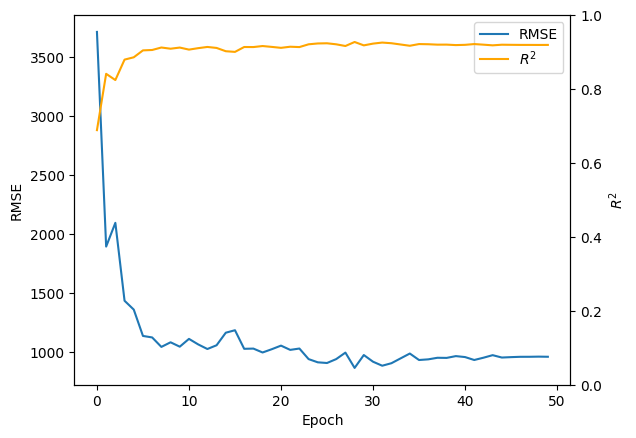

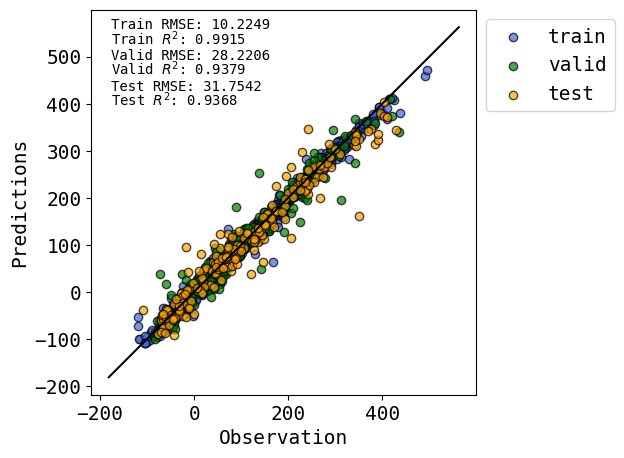

In [2]:
train.main(
    data=data,
    data_name=data_name,
    bayopt_bounds=bayopt_bounds,
    augmentation=augmentation,
    outdir="./outputs/",
    bayopt_n_epochs=10,
    bayopt_n_iters=30,
    n_epochs=50,
    tf16=False,
    loss_func="MSE",  # MSE or MAE
    seed=1
)

In [3]:
# import pickle
# import os
# import torch
# import numpy as np
# import pandas as pd
# from src.models.LSTMAttention import LightningModel
# from src.token import TrainToken
# from src import utils
# save_dir = "outputs/Tg_test"


# data = pd.read_csv("data/processed/Tg.csv")
# seed = 42

# with open(os.path.join(save_dir, "training/best_hyper_params.pkl"), mode="rb") as f:
#     best_hyper_params = pickle.load(f)

# smiles_train, smiles_valid, smiles_test, y_train, y_valid, y_test = (
#     utils.random_split(
#         smiles_input=data.iloc[:, 0],
#         prop_input=np.array(data.iloc[:, 1]),
#         random_state=seed
#     )
# )

# token = TrainToken(
#     smiles_train,
#     smiles_valid,
#     smiles_test,
#     y_train,
#     y_valid,
#     y_test,
#     augmentation,
#     save_dir,
#     poly=True
# )
# token.setup()


# model = LightningModel.load_from_checkpoint(
#     checkpoint_path=os.path.join(save_dir, "training/best_weights.ckpt"),
#     token_size=best_hyper_params[0],
#     learning_rate=best_hyper_params[5],
#     lstm_units=best_hyper_params[1],
#     dense_units=best_hyper_params[2],
#     embedding_dim=best_hyper_params[3],
#     log_flag=False,
#     # map_location=torch.device("cpu"),
# )

In [4]:
# from src.dataset import Data
# from torch.utils.data import DataLoader, TensorDataset
# from tqdm import tqdm
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# x, y, card = token.enum_tokens_train, token.enum_prop_train, token.enum_card_train

# data = Data(x, y)
# if len(y) < 10000:
#     batch_size = len(y)
# else:
#     batch_size = 10000
# dataloader = DataLoader(
#     data, batch_size=batch_size, shuffle=False, drop_last=False)
# y_pred_list = []
# y_list = []
# for dataset in tqdm(dataloader):
#     x, y = dataset[0], list(dataset[1].detach().numpy().copy().flatten())
#     with torch.no_grad():
#         y_pred = model.forward(x)
#     y_pred = list(y_pred.detach().numpy().copy().flatten())
#     y_pred_list.extend(y_pred)
#     y_list.extend(y)
# card = np.array(card)
# y_pred, _ = utils.mean_median_result(card, y_pred_list)
# y, _ = utils.mean_median_result(card, y_list)
# mae = mean_absolute_error(y, y_pred)
# rmse = mean_squared_error(y, y_pred, squared=False)
# r2 = r2_score(y, y_pred)



In [5]:
# checkpoint_path = r"D:\programming\python\chem\prediction\SMILES-X\outputs\test\Augm\training\epoch=0-step=65.ckpt"
# import torch
# state_dict = torch.load(checkpoint_path)
# state_dict

In [6]:
# import pickle

# with open(r"D:\programming\python\chem\prediction\SMILES-X\outputs\test\Augm\training\best_hyper_params.pkl", "rb") as f:
#     best_hyper_params = pickle.load(f)

# test_model = LSTMAttention.load_from_checkpoint(
#     checkpoint_path,
#     token_size=best_hyper_params[0],
#     learning_rate=best_hyper_params[5],
#     lstm_units=best_hyper_params[1],
#     dense_units=best_hyper_params[2],
#     embedding_dim=best_hyper_params[3],
#     map_location=torch.device("cpu")
# )